e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


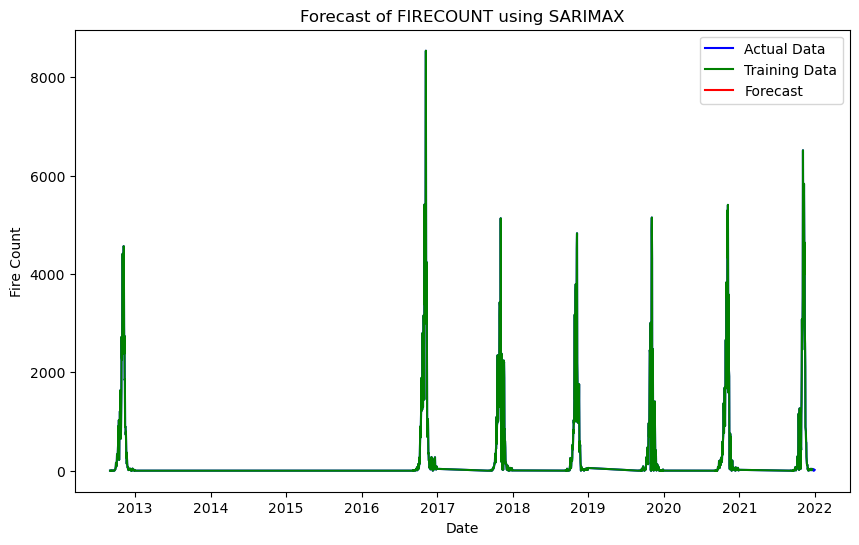

The predicted value for 2022 is 101.31
The predicted value for 2023 is 97.67
The predicted value for 2024 is 114.49
The predicted value for 2025 is 125.76
Mean Absolute Error (MAE): 53.06
Root Mean Squared Error (RMSE): 60.40


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load your dataset
data = pd.read_csv("STN1.csv")

# Ensure the 'DATE' column is in datetime format and set it as the index
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
data.set_index('DATE', inplace=True)

# Select the column you want to forecast, for example, 'FIRECOUNT'
# You can choose another numerical column if needed
time_series = data['FIRECOUNT']

# Split the dataset into train and test sets
train, test = time_series[:len(time_series)-12], time_series[len(time_series)-12:]

# Fit the SARIMAX model on the training data
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast for the next 48 months (4 years)
forecast_period = 48
forecast = model_fit.predict(start=len(train), end=len(train)+forecast_period-1)

# Create forecast date index for 2022-2025
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='ME')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, time_series, label="Actual Data", color='blue')
plt.plot(train.index, train, label="Training Data", color='green')
plt.plot(forecast_dates, forecast_series, label="Forecast", color='red')
plt.title("Forecast of FIRECOUNT using SARIMAX")
plt.xlabel("Date")
plt.ylabel("Fire Count")
plt.legend()
plt.show()

# Display predictions for 2022, 2023, 2024, and 2025
for year, value in zip(range(2022, 2026), forecast[::12]):
    print(f"The predicted value for {year} is {value:.2f}")

# Calculate Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(test, forecast[:len(test)])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Root Mean Squared Error (RMSE) on the test set
rmse = np.sqrt(mean_squared_error(test, forecast[:len(test)]))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [17]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv('D:/stubble buring/stubble/STN3.csv')

# Ensure 'DATE' is a datetime column
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)  # Drop rows with invalid/missing dates
df.set_index('DATE', inplace=True)

# Handle missing values in 'FIRECOUNT'
df['FIRECOUNT'].fillna(method='ffill', inplace=True)

# Split data into training and testing (70:30 ratio)
split_date = '2019-12-31'
train = df[df.index <= split_date]
test = df[df.index > split_date]

# Fit SARIMA model on training data
sarima_model = sm.tsa.SARIMAX(train['FIRECOUNT'], 
                              order=(1, 1, 1),     # ARIMA parameters (p, d, q)
                              seasonal_order=(1, 1, 1, 12),  # Seasonal parameters (P, D, Q, s)
                              enforce_stationarity=False, 
                              enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Print summary of SARIMA model
print(sarima_result.summary())

# Forecast for the test period using integer-based indexing
test_forecast = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1)

# Compute MAE and RMSE
mae = mean_absolute_error(test['FIRECOUNT'], test_forecast)
rmse = np.sqrt(mean_squared_error(test['FIRECOUNT'], test_forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Forecast for the next 48 months (2022-2025)
forecast_period = 48
forecast = sarima_result.predict(start=len(df), end=len(df) + forecast_period - 1)

# Create forecast date index
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='ME')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Display predictions
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_35644\243431050.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FIRECOUNT'].fillna(method='ffill', inplace=True)
C:\Users\goelk\AppData\Local\Temp\ipykernel_35644\243431050.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FIRECOUNT'].fillna(method='ffill', inplace=True)
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provid

                                     SARIMAX Results                                      
Dep. Variable:                          FIRECOUNT   No. Observations:                  192
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1378.774
Date:                            Sun, 01 Dec 2024   AIC                           2767.548
Time:                                    17:48:52   BIC                           2783.077
Sample:                                         0   HQIC                          2773.852
                                            - 192                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8638      0.126     -6.872      0.000      -1.110      -0.617
ma.L1          0.8243      0.157   

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## for stn 4 sarima 


In [3]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pmdarima as pm

# Load data
df = pd.read_csv('D:/stubble buring/stubble/STN4.csv')

# Ensure 'DATE' is a datetime column
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)  # Drop rows with invalid/missing dates
df.set_index('DATE', inplace=True)

# Handle missing values in 'FIRECOUNT'
df['PM10'].fillna(method='ffill', inplace=True)

# Sort the DataFrame by the 'DATE' index to avoid issues with slicing
df.sort_index(inplace=True)

# Split data into training and testing (2016-2021)
train = df.loc['2016-09-01':'2020-12-31']  # Training data from 2016 to 2020
test = df.loc['2021-12-01':'2021-12-31']   # Testing data for 2021

# Apply AutoSARIMA (automatic SARIMA model selection)
auto_sarima_model = pm.auto_arima(train['PM10'], 
                                  seasonal=True, 
                                  m=12,  # Seasonal period (12 for monthly data)
                                  stepwise=True,  # Stepwise search for parameters
                                  trace=True)  # Print progress of the search

# Print summary of the AutoSARIMA model
print(auto_sarima_model.summary())

# Forecast for the test period using integer-based indexing
test_forecast = auto_sarima_model.predict(n_periods=len(test))

# Compute MAE and RMSE
mae = mean_absolute_error(test['PM10'], test_forecast)
rmse = np.sqrt(mean_squared_error(test['PM10'], test_forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Forecast for the next 48 months (2022-2025)
forecast_period = 48
forecast = auto_sarima_model.predict(n_periods=forecast_period)

# Create forecast date index
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='ME')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Display predictions for 2022 to 2025
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")

import plotly.express as px

# Create a DataFrame to hold the forecast data
forecast_df = pd.DataFrame({'DATE': forecast_dates, 'Forecast': forecast})
forecast_df.set_index('DATE', inplace=True)

# Create a plot of the actual and forecasted values
fig = px.line(forecast_df, x=forecast_df.index, y='Forecast', title='SARIMA Forecast for PM10 (2022-2025)')

# Add the actual test data for comparison
test_df = pd.DataFrame({'DATE': test.index, 'Actual': test['PM10']})
fig.add_scatter(x=test_df['DATE'], y=test_df['Actual'], mode='lines', name='Actual', line=dict(dash='dot'))

# Display the plot
fig.show()



C:\Users\goelk\AppData\Local\Temp\ipykernel_22912\1834630294.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10'].fillna(method='ffill', inplace=True)
C:\Users\goelk\AppData\Local\Temp\ipykernel_22912\1834630294.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PM10'].fillna(method='ffill', inplace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2549.352, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2799.140, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2675.287, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2797.144, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2548.242, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2558.272, Time=0.20 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2547.892, Time=1.40 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=2590.755, Time=1.33 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=2574.537, Time=1.06 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=2460.273, Time=1.41 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=2477.530, Time=0.27 sec
 ARIMA(3,1,2)(1,0,2)[12] intercept   : AIC=2462.382, Time=1.85 sec
 ARIMA(3,1,2)(1,0,1)[12] inte

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [4]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pmdarima as pm

# Load data
df = pd.read_csv('D:/stubble buring/stubble/STN5.csv')

# Ensure 'DATE' is a datetime column
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)  # Drop rows with invalid/missing dates
df.set_index('DATE', inplace=True)

# Handle missing values in 'FIRECOUNT'
df['FIRECOUNT'].fillna(method='ffill', inplace=True)

# Sort the DataFrame by the 'DATE' index to avoid issues with slicing
df.sort_index(inplace=True)

# Split data into training and testing (2016-2021)
train = df.loc['2016-01-01':'2018-12-31']  # Training data from 2016 to 2020
test = df.loc['2019-01-01':'2021-12-31']   # Testing data for 2021

# Apply AutoSARIMA (automatic SARIMA model selection)
auto_sarima_model = pm.auto_arima(train['FIRECOUNT'], 
                                  seasonal=True, 
                                  m=12,  # Seasonal period (12 for monthly data)
                                  stepwise=True,  # Stepwise search for parameters
                                  trace=True)  # Print progress of the search

# Print summary of the AutoSARIMA model
print(auto_sarima_model.summary())

# Forecast for the test period using integer-based indexing
test_forecast = auto_sarima_model.predict(n_periods=len(test))

# Compute MAE and RMSE
mae = mean_absolute_error(test['FIRECOUNT'], test_forecast)
rmse = np.sqrt(mean_squared_error(test['FIRECOUNT'], test_forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Forecast for the next 48 months (2022-2025)
forecast_period = 48
forecast = auto_sarima_model.predict(n_periods=forecast_period)

# Create forecast date index
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='ME')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Display predictions for 2022 to 2025
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")

# Create a DataFrame to hold the forecast data
forecast_df = pd.DataFrame({'DATE': forecast_dates, 'Forecast': forecast})
forecast_df.set_index('DATE', inplace=True)

# Create a plot of the actual and forecasted values
fig = px.line(forecast_df, x=forecast_df.index, y='Forecast', title='SARIMA Forecast for PM10 (2022-2025)')

# Add the actual test data for comparison
test_df = pd.DataFrame({'DATE': test.index, 'Actual': test['FIRECOUNT']})
fig.add_scatter(x=test_df['DATE'], y=test_df['Actual'], mode='lines', name='Actual', line=dict(dash='dot'))

# Display the plot
fig.show()


C:\Users\goelk\AppData\Local\Temp\ipykernel_22912\513592924.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\goelk\AppData\Local\Temp\ipykernel_22912\513592924.py:15: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2475.108, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2630.817, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2491.744, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2628.821, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2465.420, Time=0.56 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2472.849, Time=0.22 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=2359.081, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=2357.946, Time=0.05 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=2358.4

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [3]:
pip install pandas numpy plotly statsmodels scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
